# Web Scraping with Beautiful Soup
[Learn Web Scraping with Beautiful Soup](https://www.codecademy.com/learn/learn-web-scraping)

# CONTENT
1. [Rules of Scraping](#Rules)
2. [Requests](#Requests)
3. [The Beautiful Soup Object](#BSObject)
4. [Object Types](#ObjectTypes)
5. [Navigating by Tags](#Tags)
6. [Website Structure](#Structure)
7. [Find All](#FindAll)
8. [Select for CSS Selectors](#CSSS)
9. [Reading Text](#Text)
10. [Chocolate Project](#Project)

<a name="Rules"></a>
## Rules of Scraping

1. Check the **legal use** of the site's data.
2. Do not spam site with requests (1 request / second).

<a name="Requests"></a>
## Requests

`request` library

In [1]:
import requests

webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/shellter.html")
print(webpage)

<Response [200]>


In [2]:
# store the content response
webpage_content = webpage.content
print(webpage_content)

b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <title>Turtle Shellter</title>\n      <link href="https://fonts.googleapis.com/css?family=Poppins" rel="stylesheet">\n      <link rel=\'stylesheet\' type=\'text/css\' href=\'style.css\'>\n  <script async src=\'/cdn-cgi/bm/cv/669835187/api.js\'></script></head>\n\n  <body>\n      <div class="banner">\n        <h1>The Shellter</h1>\n        <span class="brag">The #1 Turtle Adoption website!</span>\n      </div>\n\n      <div class="about">\n        <p class="text">Click to learn more about each turtle</p>\n      </div>\n\n    <div class="grid">\n      <div class="box adopt">\n          <a href="aesop.html" class="more-info"><img src="aesop.png" class="headshot"></a>\n          <p>Aesop</p>\n      </div>\n\n      <div class="box adopt">\n          <a href="caesar.html" class="more-info"><img src="caesar.png" class="headshot"></a>\n          <p>Caesar</p>\n      </div>\n\n      <div class="box adopt">\n          <a href="

<a name="BSObject"></a>
## The Beautiful Soup Object

Pull out the HTML parts of the page that we need.

`soup = BeautifulSoup("name.html", "html.parser")`

In [3]:
from bs4 import BeautifulSoup

webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/shellter.html",
                      "html.parser")

# convert HTML to BS object
soup = BeautifulSoup(webpage.content)
# print
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<title>Turtle Shellter</title>
<link href="https://fonts.googleapis.com/css?family=Poppins" rel="stylesheet"/>
<link href="style.css" rel="stylesheet" type="text/css"/>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<div class="banner">
<h1>The Shellter</h1>
<span class="brag">The #1 Turtle Adoption website!</span>
</div>
<div class="about">
<p class="text">Click to learn more about each turtle</p>
</div>
<div class="grid">
<div class="box adopt">
<a class="more-info" href="aesop.html"><img class="headshot" src="aesop.png"/></a>
<p>Aesop</p>
</div>
<div class="box adopt">
<a class="more-info" href="caesar.html"><img class="headshot" src="caesar.png"/></a>
<p>Caesar</p>
</div>
<div class="box adopt">
<a class="more-info" href="sulla.html"><img class="headshot" src="sulla.png"/></a>
<p>Sulla</p>
</div>
<div class="box adopt">
<a class="more-info" href="spyro.html"><img class="headshot" src="spyro.png"/>

<a name="ObjectTypes"></a>
## Object Types

BS breaks down the HTML page into several types of objects.

**Tag** &rarr; HTML tag

In [6]:
# get a specific tag, will get the FIRST TAG of that type only
print(soup.p)
# get the tag name
print(soup.p.string)
# get the tag attributes
print(soup.p.attrs)

<p class="text">Click to learn more about each turtle</p>
Click to learn more about each turtle
{'class': ['text']}


**NavigableStrings** &rarr; the pieces of text inside the HTML tags

In [8]:
print(soup.p.string)

Click to learn more about each turtle


<a name="Tags"></a>
## Navigating by Tags

In [9]:
print(soup.title)

# get the children of a tag
for child in soup.div.children:
    print(child)

<title>Turtle Shellter</title>


<h1>The Shellter</h1>


<span class="brag">The #1 Turtle Adoption website!</span>




It will print the tag containing the `ul` &rarr; tag containing the `body` == the `html` tag

In [10]:
# navigate up the tree
for parent in soup.div.parents:
    print(parent)

<body>
<div class="banner">
<h1>The Shellter</h1>
<span class="brag">The #1 Turtle Adoption website!</span>
</div>
<div class="about">
<p class="text">Click to learn more about each turtle</p>
</div>
<div class="grid">
<div class="box adopt">
<a class="more-info" href="aesop.html"><img class="headshot" src="aesop.png"/></a>
<p>Aesop</p>
</div>
<div class="box adopt">
<a class="more-info" href="caesar.html"><img class="headshot" src="caesar.png"/></a>
<p>Caesar</p>
</div>
<div class="box adopt">
<a class="more-info" href="sulla.html"><img class="headshot" src="sulla.png"/></a>
<p>Sulla</p>
</div>
<div class="box adopt">
<a class="more-info" href="spyro.html"><img class="headshot" src="spyro.png"/></a>
<p>Spyro</p>
</div>
<div class="box adopt">
<a class="more-info" href="zelda.html"><img class="headshot" src="zelda.png"/></a>
<p>Zelda</p>
</div>
<div class="box adopt">
<a class="more-info" href="bandicoot.html"><img class="headshot" src="bandicoot.png"/></a>
<p>Bandicoot</p>
</div>
<div

<a name="Structure"></a>
## Website Structure
We need to know the website structure and what we are looking for.

Most browsers have [**Dev Tools**](https://www.codecademy.com/article/use-devtools) &rarr; **inspect** the website (see its HTML elements).

**HTML Inspection** &rarr; **Locate the required info**

<a name="FindAll"></a>
## Find All
`find_all()` &rarr; all the occurences of a tag

It is very **flexible** &rarr; it can take **regexes**, **attributes**, and **functions**!

In [15]:
turtle_links = soup.find_all("a")

In [18]:
import re

prefix = "https://content.codecademy.com/courses/beautifulsoup/"

links = []
# find all headers (1-9) using regex
for a in turtle_links:
    links.append(prefix+a["href"])
    
print(links)

['https://content.codecademy.com/courses/beautifulsoup/aesop.html', 'https://content.codecademy.com/courses/beautifulsoup/caesar.html', 'https://content.codecademy.com/courses/beautifulsoup/sulla.html', 'https://content.codecademy.com/courses/beautifulsoup/spyro.html', 'https://content.codecademy.com/courses/beautifulsoup/zelda.html', 'https://content.codecademy.com/courses/beautifulsoup/bandicoot.html', 'https://content.codecademy.com/courses/beautifulsoup/hal.html', 'https://content.codecademy.com/courses/beautifulsoup/mock.html', 'https://content.codecademy.com/courses/beautifulsoup/sparrow.html']


In [19]:
# find header 1 & 2 using a list
soup.find_all(['h1', 'h2'])

[<h1>The Shellter</h1>]

In [23]:
# find elements using attrs
soup.find_all(attrs={'h1':'Turtle'})
# find elements with a combination of attrs
soup.find_all(attrs={'h1':'', 'id':''})

[<html>
 <head>
 <meta charset="utf-8"/>
 <title>Turtle Shellter</title>
 <link href="https://fonts.googleapis.com/css?family=Poppins" rel="stylesheet"/>
 <link href="style.css" rel="stylesheet" type="text/css"/>
 <script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
 <body>
 <div class="banner">
 <h1>The Shellter</h1>
 <span class="brag">The #1 Turtle Adoption website!</span>
 </div>
 <div class="about">
 <p class="text">Click to learn more about each turtle</p>
 </div>
 <div class="grid">
 <div class="box adopt">
 <a class="more-info" href="aesop.html"><img class="headshot" src="aesop.png"/></a>
 <p>Aesop</p>
 </div>
 <div class="box adopt">
 <a class="more-info" href="caesar.html"><img class="headshot" src="caesar.png"/></a>
 <p>Caesar</p>
 </div>
 <div class="box adopt">
 <a class="more-info" href="sulla.html"><img class="headshot" src="sulla.png"/></a>
 <p>Sulla</p>
 </div>
 <div class="box adopt">
 <a class="more-info" href="spyro.html"><img class="headshot" src

In [29]:
# find elements using a function

<a name="CSSS"></a>
## Select for CSS Selector
`select()` &rarr; takes in all of the CSSS of a `.css` file

In [30]:
turtle_data = {}
for link in links:
    webpage = requests.get(link)
    turtle = BeautifulSoup(webpage.content, "html.parser")
    turtle_name = turtle.select(".name")[0]
    turtle_data[turtle_name] = []
    
print(turtle_data)

{<p class="name">Aesop</p>: [], <p class="name">Caesar</p>: [], <p class="name">Sulla</p>: [], <p class="name">Spyro</p>: [], <p class="name">Zelda</p>: [], <p class="name">Bandicoot</p>: [], <p class="name">Hal</p>: [], <p class="name">Mock</p>: [], <p class="name">Sparrow</p>: []}


<a name="Text"></a>
## Reading Text
`get_text()` &rarr; retrieve the text inside of a tag

In [33]:
import requests
from bs4 import BeautifulSoup

prefix = "https://content.codecademy.com/courses/beautifulsoup/"
webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/shellter.html')

webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")

turtle_links = soup.find_all("a")
links = []
#go through all of the a tags and get the links associated with them:
for a in turtle_links:
    links.append(prefix+a["href"])
    
#Define turtle_data:
turtle_data = {}

#follow each link:
for link in links:
    webpage = requests.get(link)
    turtle = BeautifulSoup(webpage.content, "html.parser")
    # keep only the text without the tags as a dict key
    turtle_name = turtle.select(".name")[0].get_text()
    # get the text of the 'ul' element, seperated by '|', then split by '|'
    turtle_data[turtle_name] = turtle.find("ul").get_text("|").split('|')

print(turtle_data)  

{'Aesop': ['\n', 'AGE: 7 Years Old', '\n', 'WEIGHT: 6 lbs', '\n', 'SEX: Female', '\n', 'BREED: African Aquatic Sideneck Turtle', '\n', 'SOURCE: found in Lake Erie', '\n'], 'Caesar': ['\n', 'AGE: 2 Years Old', '\n', 'WEIGHT: 4 lbs', '\n', 'SEX: Male', '\n', 'BREED: Greek Tortoise', '\n', 'SOURCE: hatched in house', '\n'], 'Sulla': ['\n', 'AGE: 1 Year Old', '\n', 'WEIGHT: 1 lb', '\n', 'SEX: Male', '\n', 'BREED: African Aquatic Sideneck Turtle', '\n', 'SOURCE: found in Lake Erie', '\n'], 'Spyro': ['\n', 'AGE: 6 Years Old', '\n', 'WEIGHT: 3 lbs', '\n', 'SEX: Female', '\n', 'BREED: Greek Tortoise', '\n', 'SOURCE: hatched in house', '\n'], 'Zelda': ['\n', 'AGE: 3 Years Old', '\n', 'WEIGHT: 2 lbs', '\n', 'SEX: Female', '\n', 'BREED: Eastern Box Turtle', '\n', 'SOURCE: surrendered by owner', '\n'], 'Bandicoot': ['\n', 'AGE: 2 Years Old', '\n', 'WEIGHT: 2 lbs', '\n', 'SEX: Male', '\n', 'BREED: African Aquatic Sideneck Turtle', '\n', 'SOURCE: hatched in house', '\n'], 'Hal': ['\n', 'AGE: 1 Year 

In [35]:
import pandas as pd

# create a DF from dict
turtle_df = pd.DataFrame.from_dict(turtle_data, orient='index')
print(turtle_df)

           0                   1   2                3   4            5   6   \
Aesop      \n    AGE: 7 Years Old  \n    WEIGHT: 6 lbs  \n  SEX: Female  \n   
Caesar     \n    AGE: 2 Years Old  \n    WEIGHT: 4 lbs  \n    SEX: Male  \n   
Sulla      \n     AGE: 1 Year Old  \n     WEIGHT: 1 lb  \n    SEX: Male  \n   
Spyro      \n    AGE: 6 Years Old  \n    WEIGHT: 3 lbs  \n  SEX: Female  \n   
Zelda      \n    AGE: 3 Years Old  \n    WEIGHT: 2 lbs  \n  SEX: Female  \n   
Bandicoot  \n    AGE: 2 Years Old  \n    WEIGHT: 2 lbs  \n    SEX: Male  \n   
Hal        \n     AGE: 1 Year Old  \n  WEIGHT: 1.5 lbs  \n  SEX: Female  \n   
Mock       \n   AGE: 10 Years Old  \n   WEIGHT: 10 lbs  \n    SEX: Male  \n   
Sparrow    \n  AGE: 1.5 Years Old  \n  WEIGHT: 4.5 lbs  \n  SEX: Female  \n   

                                               7   8   \
Aesop      BREED: African Aquatic Sideneck Turtle  \n   
Caesar                      BREED: Greek Tortoise  \n   
Sulla      BREED: African Aquatic Side

<a name="Project"></a>
## Chocolate Project


In [43]:
# imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Task 2**

Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

The URL is: https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

In [48]:
# get HTML
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

**Tasks 3 & 4**

Create a BeautifulSoup object called soup to traverse this HTML.

Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [49]:
# instantiate BS object
soup = BeautifulSoup(webpage.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

**Task 5**

The first thing to do is to put all of the ratings into a list.

Use a command on the `soup` object to get all of the tags that contain the ratings.

In [59]:
ratings_data = soup.find_all(attrs={'class': 'Rating'})
print(ratings_data)

[<td class="Rating">Rating</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">4</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">4</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">4</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3</td>, <td class="Rating">3.75</td>, <td class

**Tasks 6 & 7**

Create an empty list called `ratings` to store all the ratings in.

Loop through the `ratings tags` and get the text contained in each one. Add it to the ratings list while converting the **rating to a float**.

In [60]:
ratings = []
# ratings_data 1st element is the word "Rating"
print(type(ratings_data))
print(ratings_data[0])

# we want only the numerical scores
for rating in ratings_data[1:]:
    # append and convert them to float
    ratings.append(float(rating.string))
    
print(ratings)

<class 'bs4.element.ResultSet'>
<td class="Rating">Rating</td>
[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.

**Task 8**

Using Matplotlib, create a histogram of the ratings values

plt.hist(ratings)
Remember to show the plot using plt.show()!

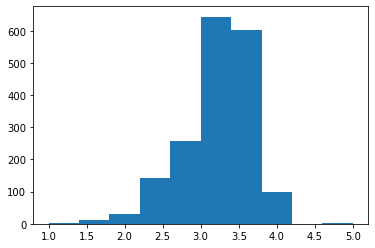

In [61]:
plt.hist(ratings)
plt.show()

**Task 9**

We want to now **find the 10 most highly rated chocolatiers**. One way to do this is to **make a DataFrame** that has the chocolate companies in one column, and the ratings in another. Then, we can do a **groupby** to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.

In [62]:
company_data = soup.select('.Company')

**Tasks 10 & 11**

Make an empty list to hold company names.

Loop through the tags containing company names, and add the text from each tag to the list you just created.

In [63]:
companies = []

for company in company_data[1:]:
    companies.append(company.string)
    
print(companies)

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 

**Task 12**

Create a DataFrame with a column “Company” corresponding to your companies list, and a column “Ratings” corresponding to your ratings list.

In [64]:
comp_rates_dict = {
        'Company': companies,
        'Rating': ratings
        }

df = pd.DataFrame.from_dict(comp_rates_dict)
df.head()

,Company,Rating
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50


**Task 13**

Use `.groupby` to group your DataFrame by Company and take the average of the grouped ratings.

Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. 

Print them out.

In [66]:
# get the average rating by company
avg_ratings = df.groupby('Company').Rating.mean()
# get the 10 higest rated companies
top_ten = avg_ratings.nlargest(10)
# print the results
print(top_ten)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


**Task 14**

We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

It looks like the cocoa percentages are in the table under the Cocoa Percent column.

Create a list that contains all of the cocoa percentages.

Store each percent as a float, after stripping off the % character.

In [67]:
# get the class 'CocoaPercent'
cocoa_data = soup.select('.CocoaPercent')
# create an empty list
cocoa_pcts = []
# iterate through cocoa_data starting from 1
for cocoa_pct in cocoa_data[1:]:
    cocoa_pcts.append(int(float(cocoa_pct.string[:-1])))
print(cocoa_pcts)

[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63, 70, 63, 70, 70, 60, 80, 88, 72, 55, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 70, 70, 70, 70, 60, 60, 60, 60, 60, 60, 60, 80, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 85, 85, 72, 73, 64, 66, 75, 63, 70, 68, 70, 70, 75, 70, 70, 70, 70, 70, 70, 70, 63, 70, 66, 75, 85, 50, 75, 60, 75, 75, 75, 72, 75, 75, 70, 70, 73, 70, 70, 70, 70, 70, 70, 70, 70, 70, 73, 70, 68, 70, 70, 70, 70, 75, 70, 75, 72, 72, 72, 72, 100, 72, 72, 72, 72, 75, 72, 72, 80, 75, 72, 72, 72, 68, 72, 70, 77, 75, 70, 80, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 65, 70, 65, 73, 72, 80, 70, 70, 90, 64, 64, 64, 71, 70, 70, 70, 83, 78, 83, 74, 74, 74, 73, 72, 72, 55, 64, 88, 72, 72, 70, 74, 64, 72, 76, 76, 78, 86, 72, 75, 70, 65, 70, 78, 75, 65, 75, 65, 71, 75, 68, 70, 70, 70, 70, 70, 82, 72, 82, 75, 75, 75, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 100, 75, 75, 77, 1

**Task 15**

Add the cocoa percentages as a column called "CocoaPercentage" in the DataFrame that has companies and ratings in it.

In [68]:
df['CocoaPercentage'] = cocoa_pcts
df.head()

,Company,Rating,CocoaPercentage
0,A. Morin,3.75,63
1,A. Morin,2.75,70
2,A. Morin,3.00,70
3,A. Morin,3.50,70
4,A. Morin,3.50,70


**Task 16**

Make a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage).

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

Remember that your plots will show up at the address localhost in the web browser.

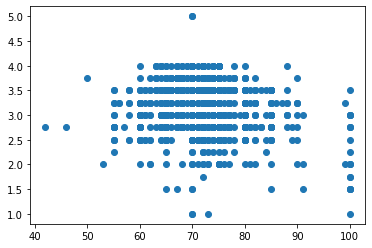

<Figure size 432x288 with 0 Axes>

In [71]:
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()

# clear the current figure (if one exists!)
#plt.clf()

**Task 17**

Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

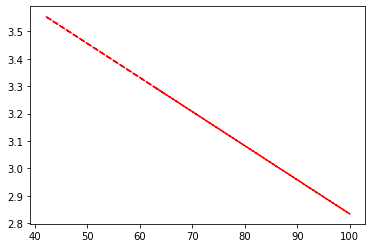

In [73]:
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), 'r--')
plt.show()